## Model Evaluation : Classification

## Confsuion Matrix

In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                   cancer.target,
                                                   stratify = cancer.target,
                                                   random_state = 66)

model = SVC(gamma = 0.001, C=1)
model.fit(X_train, y_train)

print(f'SVC train score {model.score(X_train, y_train):.4f}')
print(f'SVC test score {model.score(X_test, y_test):.4f}')

SVC train score 0.9789
SVC test score 0.9091


In [14]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

m = confusion_matrix(y_test, y_pred)

print(f'혼동행렬 : \n {m}')

혼동행렬 : 
 [[48  5]
 [ 8 82]]


### Confusion Matrix
![nn](confusion_matrix.png)

In [17]:
## Acccuracy :

accuracy = (m[0,0] + m[1,1])/m.sum()

print(f'acurracy : {accuracy:.4f}')

acurracy : 0.9091


In [18]:
## precision :

precision = m[1,1] / m[:,1].sum()
print(f'precision : {precision:.4f}')

precision : 0.9425


In [19]:
## recall :

recall = m[1,1]/ m[1,:].sum()
print(f'recall : {recall:.4f}')

recall : 0.9111


In [21]:
## F1 score

f1 = 2*(precision * recall)/(precision + recall)
print(f'F1 score : {f1:.4f}')

F1 score : 0.9266


### ROC curve and AUC

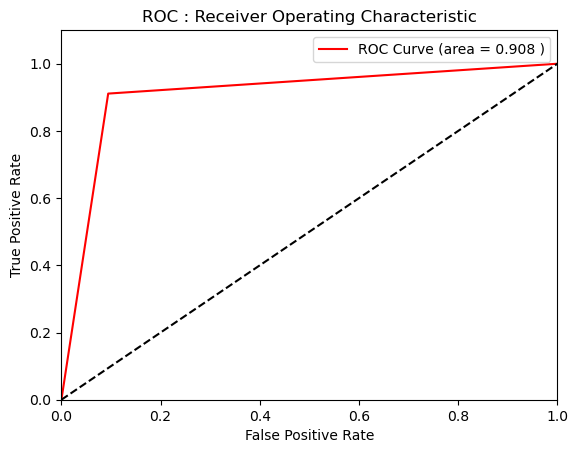

In [24]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 위양성률과 진양성률을 산출
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# auc의 산출
auc = auc(fpr, tpr)

# ROC curve
plt.plot(fpr, tpr, color ='red', label = f'ROC Curve (area = {auc:.3f} )')
plt.plot([0,1], [0,1], color = 'black', linestyle = '--')

plt.xlim(0, 1)
plt.ylim(0,1.1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC : Receiver Operating Characteristic")
plt.legend(loc= 'best')
plt.show()